# [Lab Session 2](otsu.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [3]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')

**[Task 1.2.]()** Quantify the image into 256 bins:

In [4]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [5]:
h = np.zeros(256)

for x in img8.flatten() :
    h[x] += 1

print(h)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 1.38400e+03 1.25478e+05 5.50322e+05 3.44173e+05 7.58140e+04
 2.48010e+04 1.36310e+04 9.13900e+03 7.39000e+03 6.74300e+03 6.93000e+03
 7.92500e+03 9.88700e+03 1.23170e+04 1.46320e+04 1.61230e+04 1.74000e+04
 1.75300e+04 1.67810e+04 1.49330e+04 1.31710e+04 1.09560e+04 8.97200e+03
 7.37900e+03 6.16300e+03 5.23700e+03 4.49100e+03 3.96200e+03 3.38200e+03
 2.84100e+03 2.50500e+03 2.06900e+03 1.77900e+03 1.39700e+03 1.19400e+03
 1.01200e+03 8.85000e+02 7.33000e+02 6.39000e+02 5.54000e+02 5.18000e+02
 4.19000e+02 3.71000e+02 3.02000e+02 2.62000e+02 2.59000e+02 2.05000e+02
 1.67000e+02 1.55000e+02 1.45000e+02 1.18000e+02 1.00000e+02 1.03000e+02
 7.30000e+01 8.70000e+01 6.50000e+01 5.40000e+01 4.20000e+01 3.50000e+01
 2.20000e+01 2.30000e+01 1.40000e+01 1.30000e+01 7.

Show the computed histogram:

<BarContainer object of 256 artists>

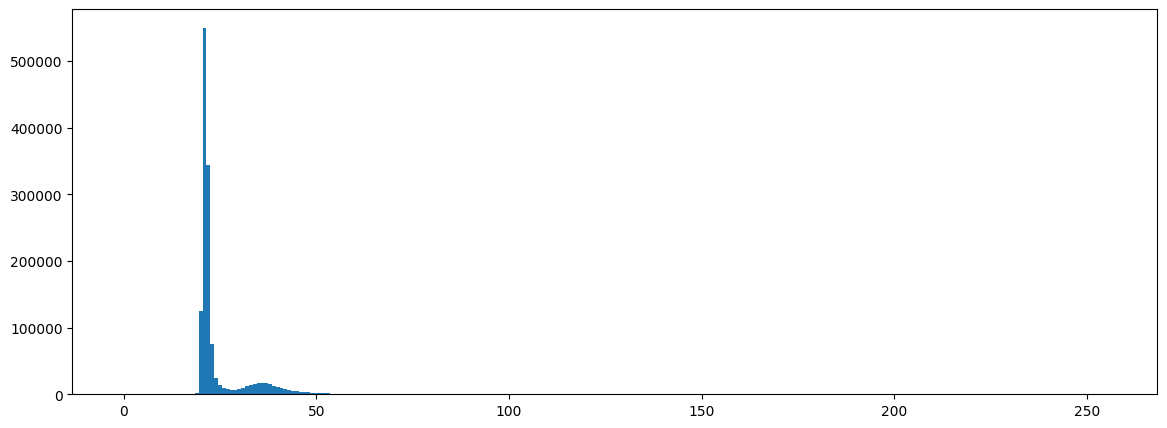

In [6]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [10]:
otsu = []


for T in range(256) : 

    x1 = 0
    x2 = 0
    y1 = 0
    y2 = 0

    if sum(h[:T]) > 0 :
        for I in range(0, T) :
            x1 += I * h[I]
        m1 = 1 / (sum(h[:T])) * x1
        for I in range(0, T) :
            y1 += (I-m1) ** 2 * h[I]
        s1 = 1 / sum(h[:T]) * y1
    else :
        s1 = 0

    if sum(h[T:256]) > 0 :
        for I in range(T, 256) :
            x2 += I * h[I]
        m2 = 1 / sum(h[T:256]) * x2
        for I in range(T, 256) :
            y2 += (I-m2) ** 2 * h[I]
        s2 = 1 / sum(h[T:256]) * y2
    else : 
        s2 = 0

    otsu.append(sum(h[:T]) * s1 + sum(h[T:256]) * s2)

print(otsu.index(min(otsu)))
thres = otsu.index(min(otsu))

31


**[Task 1.5.]()** Perform Otsu thresholding:

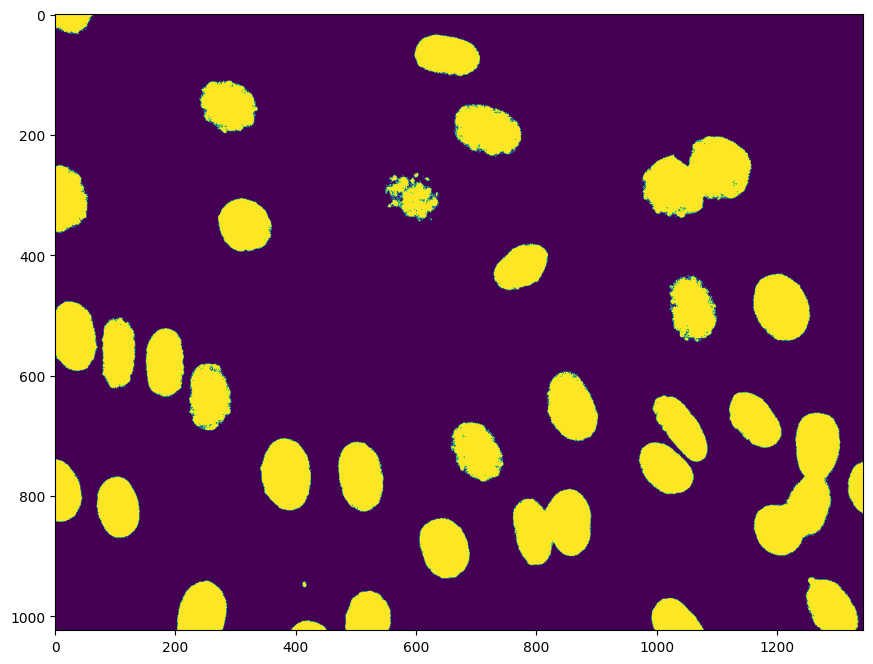

In [11]:
binimg = img8 >= thres
plt.figure(figsize=(15,8))
plt.imshow(binimg)

**[Task 1.6.]()** Compute the Dice coefficient:

In [12]:
ground = plt.imread('data/NIH3T3/gt/0.png')
binground = ground > 0.5

dice = 2 * (binimg * binground).sum() / (binimg.sum() + binground.sum())

print(dice)

0.8943783223933183
